<a href="https://colab.research.google.com/github/reshmarani/AI_Assignments/blob/master/catdogclassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import numpy as np
import os
from random import shuffle
import cv2 



from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_file = "/content/drive/My Drive/Colab Notebooks/train.zip"
test_file = "/content/drive/My Drive/Colab Notebooks/test.zip"


In [0]:
import zipfile

with zipfile.ZipFile(train_file,'r') as z:
  z.extractall()
with zipfile.ZipFile(test_file,'r') as z:
  z.extractall()

In [0]:
ls

drive/  log/  sample_data/  test/  train/  train_data.npy


In [0]:
TEST_DIR = "./test/"
TRAIN_DIR= "./train/"
LEARNING_RATE= 1e-3
MODEL_NAME = "dogsvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMG_SIZE = 50

In [0]:
def label_image(img):
  img_name = img.split(".")[-3]
  if img_name == "cat":
    return [1,0]
  elif img_name == "dog" :
    return [0,1]

In [0]:
#IMAGE_SIZE =50
def create_train_data():
  training_data=[]
  
  
  for img in tqdm(os.listdir(TRAIN_DIR)):
    label = label_image(img)
    path= os.path .join (TRAIN_DIR,img)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label)])
  shuffle(training_data)
  np.save('train_data.npy',training_data)
  return training_data

In [0]:
train_data=create_train_data()
#train_data()= np.load('train_data.npy')



100%|██████████| 25000/25000 [00:26<00:00, 943.60it/s]


In [0]:
import tflearn
from tflearn.layers.conv import conv_2d , max_pool_2d
from tflearn.layers.core import input_data , dropout , fully_connected
from tflearn.layers.estimator import regression


In [0]:
convnet = input_data(shape=[None , IMG_SIZE , IMG_SIZE ,1] , name='input')
 
convnet = conv_2d(convnet , 32 , 5 , activation= 'relu')
convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet , 64 , 5 , activation= 'relu')
convnet = max_pool_2d(convnet,5)


convnet = conv_2d(convnet , 128 , 5 , activation= 'relu')
convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet , 1000 , 5 , activation= 'relu')
convnet = max_pool_2d(convnet,5)


convnet = fully_connected(convnet , 1024 , activation= 'relu')
convnet = dropout (convnet , 0.8)

convnet = fully_connected(convnet , 2 , activation= 'softmax')
convnet = regression(convnet , optimizer = 'adam', learning_rate=LEARNING_RATE , loss ='categorical_crossentropy',name ='targets')

model=tflearn.DNN(convnet,tensorboard_dir='log')



In [0]:
import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None,IMG_SIZE,IMG_SIZE,1],name ='input')

convnet = conv_2d(convnet , 32 , 5 , activation = 'relu')
convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet , 64 , 5 , activation = 'relu')
convnet = max_pool_2d(convnet,5)


convnet = conv_2d(convnet , 128 , 5 , activation = 'relu')
convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet , 1000, 5 , activation = 'relu')
convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet , 1024 , activation ='relu')
convnet = dropout(convnet , 0.8)

convnet = fully_connected(convnet , 2, activation= 'softmax')
convnet = regression(convnet,optimizer='adam',learning_rate=LEARNING_RATE,loss='categorical_crossentropy',name='targets')


model= tflearn.DNN(convnet,tensorboard_dir='log')



In [0]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')
  

In [0]:
train = train_data[:-500]
test = train_data[-500:]

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y= [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]


In [0]:
model.fit({'input':X}, {'targets':Y}, n_epoch= 3,validation_set=({'input': test_x} , {'targets': test_y}),
          snapshot_step=50, show_metric=True, run_id=MODEL_NAME)
          

Training Step: 1148  | total loss: 11.28947 | time: 386.703s
| Adam | epoch: 003 | loss: 11.28947 - acc: 0.5097 -- iter: 24448/24500
Training Step: 1149  | total loss: 11.27584 | time: 388.700s
| Adam | epoch: 003 | loss: 11.27584 - acc: 0.5103 | val_loss: 11.42082 - val_acc: 0.5040 -- iter: 24500/24500
--


In [0]:
# if you need to create the data:
#test_data = process_test_data()
#if you already have some saved:
#test-data = np.load('test_data.npy')
testing_data =[]
for img in tqdm(os.listdir("./test/")):
  path =os.path.join("./test" , img)
  img_num = img.split('.')[0]
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img , (IMG_SIZE , IMG_SIZE))
  testing_data.append([np.array(img), img_num])  

100%|██████████| 12500/12500 [00:13<00:00, 931.56it/s]


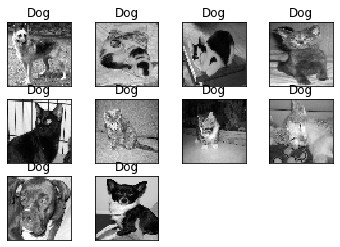

In [0]:
fig=plt.figure()
for num,data in enumerate(testing_data[:10]):
  # cat: [1,0]
  # dog: [0,1]
  
  img_num = data[1]
  img_data=data[0]
  
  y= fig.add_subplot(3,4,num+1)
  orig= img_data
  data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
  #model_out = model.predict([data])[0]
  model_out = model.predict([data])[0]
  
  if np.argmax(model_out)== 0: str_label='Dog'
  else: str_label='Cat'
    
  y.imshow(orig,cmap ='gray')
  plt.title(str_label)
  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)
plt.show()